# Project Proposal

## Introduction

According to the World Stroke Organization, 13.7 million people will have a stroke this year for the first time and over five million of them will die as a result. In addition, the CDC states that 80% of strokes are preventable if at-risk patients are identified and have their risk factors treated.

To help identify at-risk patients, we are trying to find out **which factor(s) included in the dataset increase the risk of stroke the most**. To answer this question, we will use the Stroke Prediction Dataset that includes 11 clinical features for predicting strokes and has over 5100 observations. Although the dataset's source is confidential, the data seems to be accurate and complete.

## Preliminary Exploratory Data Analysis

### Reading Data From the Web

In [2]:
options(warn=-1)

library(readr)
data <- read_csv("https://raw.githubusercontent.com/yazankhasawneh/dsci-100-group-project/main/healthcare-dataset-stroke-data.csv?token=GHSAT0AAAAAABOQJJNG6YSQJOZZLTXU43ACYRJDB6A")
head(data)

Parsed with column specification:
cols(
  id = col_double(),
  gender = col_character(),
  age = col_double(),
  hypertension = col_double(),
  heart_disease = col_double(),
  ever_married = col_character(),
  work_type = col_character(),
  Residence_type = col_character(),
  avg_glucose_level = col_double(),
  bmi = col_character(),
  smoking_status = col_character(),
  stroke = col_double()
)



id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


### Data Cleaning

No additional tidying up is necessary as the data set already satisfied the reequipments of tidy data.

#### Redefine the Variables' Datatypes

In [5]:
options(warn=-1)

data$stroke <- as.factor(data$stroke)
data$bmi <- as.double(data$bmi)
data$gender <- as.factor(data$gender)
data$hypertension <- as.factor(data$hypertension)
data$heart_disease <- as.factor(data$heart_disease)
data$work_type <- as.factor(data$work_type)
data$Residence_type <- as.factor(data$Residence_type)
data$smoking_status <- as.factor(data$smoking_status)

#### Data Spliting

The dataset is split into two segments; training data and test data. We use 75% of the data for training and the other 25% for testing.

In [16]:
options(warn=-1)

set.seed(999)
library(tidyverse)
library(tidymodels)

data_split <- initial_split(data, prop = 0.75, strata = stroke)
data_train <- training(data_split)
data_test <- testing(data_split)

In [17]:
library(dplyr)

summary_data <- data_train %>%
    group_by(stroke) %>%
    summarise(Count = n())

summary_data

`summarise()` ungrouping output (override with `.groups` argument)



stroke,Count
<fct>,<int>
0,3652
1,181


#### Missing Values

In [18]:
missing_data <- data.frame(colSums(is.na(data_train)))
colnames(missing_data) <- c("Number of Missing Values")

missing_data

,Number of Missing Values
,<dbl>
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0


In [19]:
summary(data_train)

       id           gender          age        hypertension heart_disease
 Min.   :   67   Female:2275   Min.   : 0.08   0:3463       0:3631       
 1st Qu.:17515   Male  :1557   1st Qu.:25.00   1: 370       1: 202       
 Median :36811   Other :   1   Median :45.00                             
 Mean   :36464                 Mean   :43.15                             
 3rd Qu.:54726                 3rd Qu.:61.00                             
 Max.   :72940                 Max.   :82.00                             
                                                                         
 ever_married               work_type    Residence_type avg_glucose_level
 Length:3833        children     : 525   Rural:1884     Min.   : 55.12   
 Class :character   Govt_job     : 491   Urban:1949     1st Qu.: 77.55   
 Mode  :character   Never_worked :  14                  Median : 92.30   
                    Private      :2173                  Mean   :106.34   
                    Self-employed: 630

### Data Visualization

#### Visualizing Relationships in the Training Data

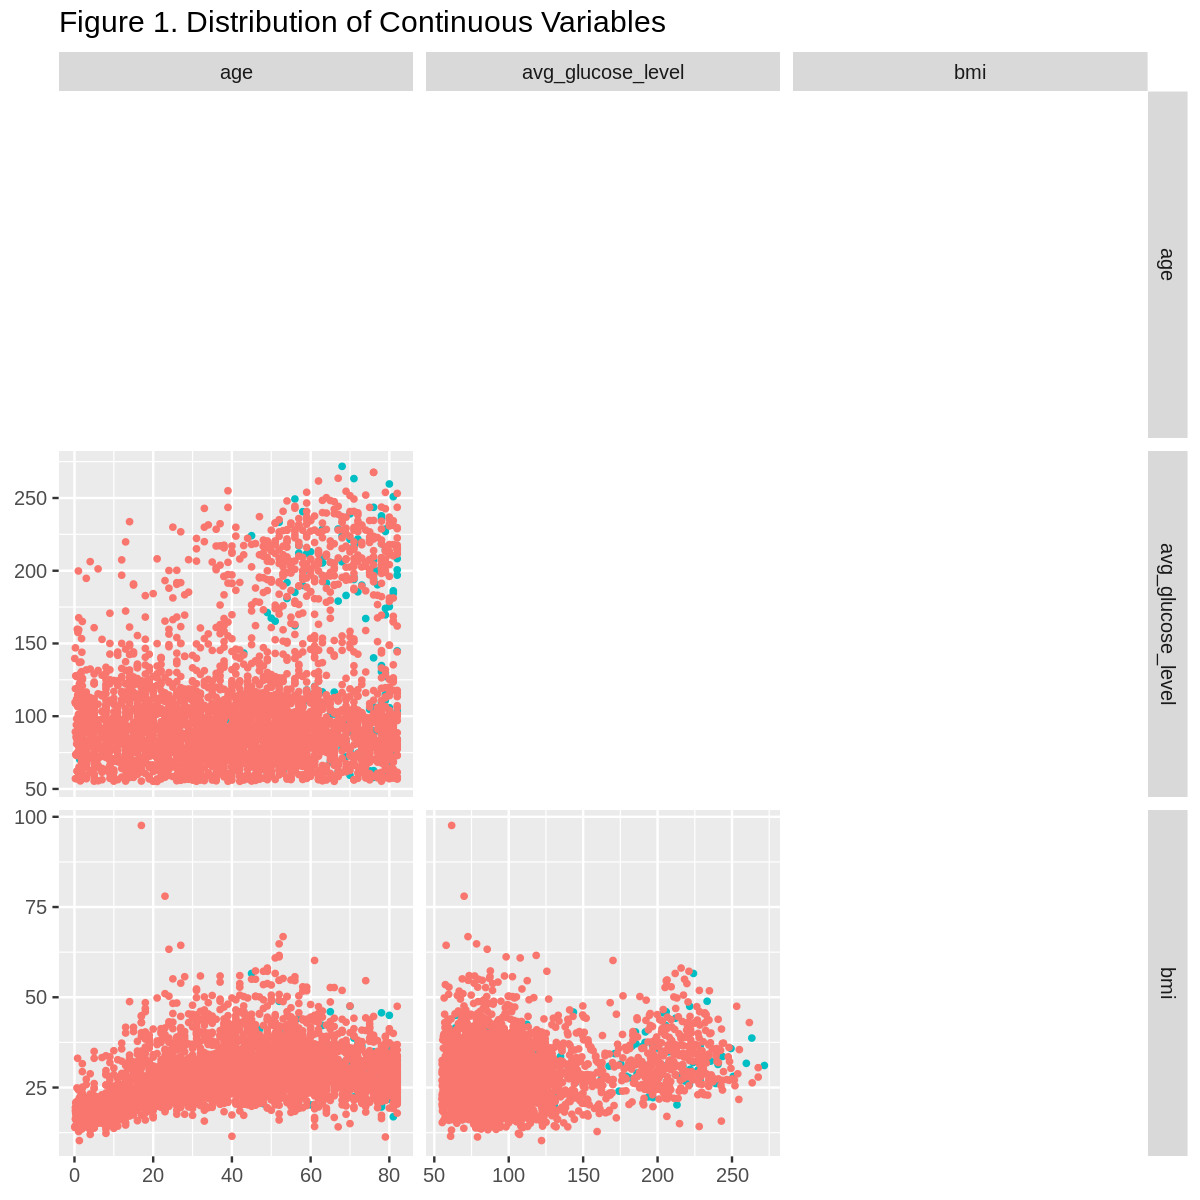

In [22]:
#install.packages("ggplot2")       
#install.packages("GGally")
library("ggplot2")                     
library("GGally")

options(repr.plot.width = 10, repr.plot.height = 10) 

plot_pairs <- data_train %>% 
  select(age,avg_glucose_level,
         bmi,stroke) %>%
  ggpairs(columns=1:3,
          mapping = ggplot2::aes(color = stroke),
          upper="blank",
          diag = NULL)+
          labs(color="Stroke")+
          ggtitle("Figure 1. Distribution of Continuous Variables") +
          theme(plot.title = element_text(hjust = 1),
                axis.text.x = element_text(hjust = 1, color = "black",size=10),
                axis.text.y = element_text(hjust = 1, color = "black",size=10),
                legend.position = "bottom")+
          theme_grey(base_size = 15)

plot_pairs

## Methods

#### Variable Selection

As shown above, the continuous variables all have some correlation with the target variable and with each other. The categorical variables all hold personal details of the patient and we can therefore use all the variables with the exception of `id` as it is simply a unique identifier.

#### Data Analysis

We will being our data analysis by first scaling the continuous variable. We will then fit the data into K-nearest neighbour model with 5-fold cross validation. The specification of stroke will be the dependent variable and other features as independent variables. We hope to then the use the trained model from the training dataset to predict the stroke variable in the test dataset. Finally, we will compute the accuracy to determine the model's performance and adjust the model if needed.

#### Data Visualization

We hope to use different kinds of plots, such as scatter plots, as a way to visualize the results and show the reader the presence of any significant relationships and patterns. We also hope to utilize features, such as coloring points, to clearly convey the message to the reader.

## Expected Outcomes and Significance

Although we cannot accurately predict the results without prior medical knowledge, we are confident that our findings will decrease the number of strokes if properly utilized and will overall lead to better stroke prediction by healthcare providers. Healthcare providers will also be able to start treatment plans for at-risk patients earlier and have those treatment plans focused more accurately on specific risk factors. This project does not only focus on predicting whether a patient is likely to experience a stroke, but it also strongly emphasizes the important of finding out why the patient might experience a stroke and what they can do to prevent it.

Our findings can also raise further questions. For a start, we can ask why certain factors increase the risk of having a stroke and other factors don't. We can also formulate other questions that focus on how to prevent strokes efficiently. For example, how do we remove x risk-factor for an entire community without drastic changes to their lifestyle?